In [1]:
!pip install diffusers transformers accelerate

  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 74.8 MB/s eta 0:00:00a 0:00:01
Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (751 kB)
Using cached tokenizers-0

In [18]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [38]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda:3")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [39]:
prompt = """ poster showing food idli sambhar, don't write anything on poster"
"""

In [40]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

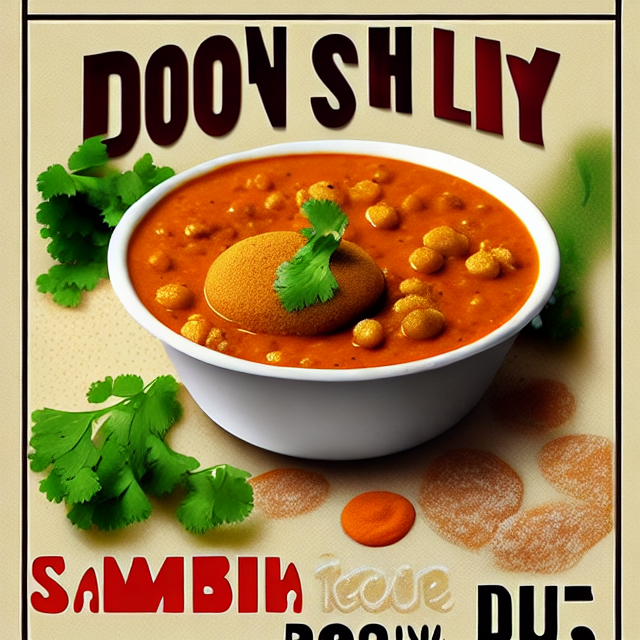

In [41]:
image

[PROMPT]:  A high-quality image of a delicious dish



PIL.Image.Image

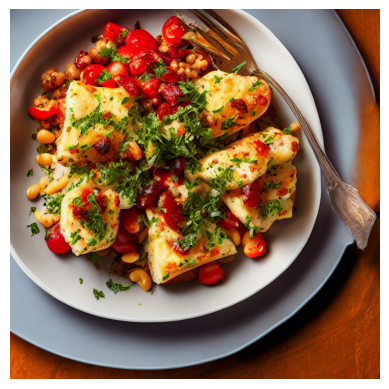

In [9]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');
type(image)

In [10]:
image.save("output/generated_image.png")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', facebook ads manager , mailchimp for emails , and google analytics for tracking performance . apply your skills by creating a blog or website , running test ad campaigns , and managing social media accounts . learn to analyze data using tools like google analytics and perform a / b testing to improve results . earning certifications such as google ads , google analytics , and hubspot content marketing can help validate your skills . stay updated by following industry blogs , joining online communities , and attending webinars . finally , consider specializing in one area like seo , social media marketing , or email marketing based on your interests and strengths .']
100%|██████████| 50/50 [00:01<00:00, 32.29it/s]


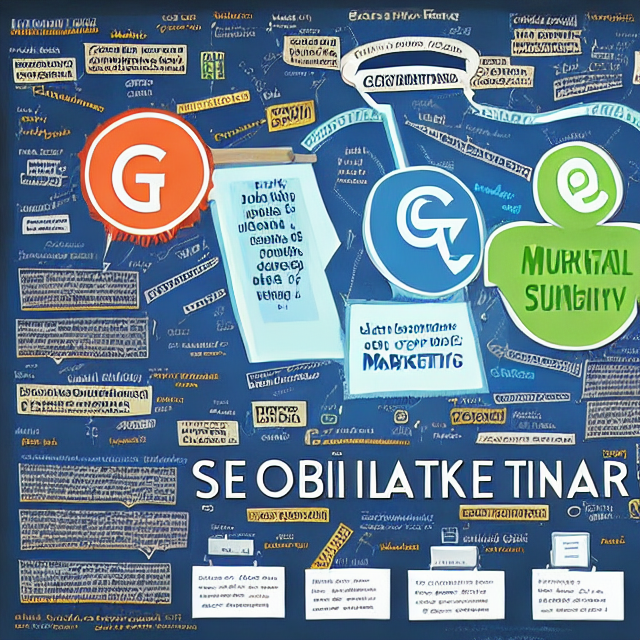

In [18]:
prompt_dig='Give me the plot/diagram to explain this, so that i can paste in ppt: To learn digital marketing, start by understanding the basics such as SEO, SEM, content marketing, social media, email marketing, and analytics. Free resources like Google Digital Garage and HubSpot Academy are great places to begin. Next, familiarize yourself with popular tools like Google Ads, Facebook Ads Manager, Mailchimp for emails, and Google Analytics for tracking performance. Apply your skills by creating a blog or website, running test ad campaigns, and managing social media accounts. Learn to analyze data using tools like Google Analytics and perform A/B testing to improve results. Earning certifications such as Google Ads, Google Analytics, and HubSpot Content Marketing can help validate your skills. Stay updated by following industry blogs, joining online communities, and attending webinars. Finally, consider specializing in one area like SEO, social media marketing, or email marketing based on your interests and strengths.'
image = pipe(prompt_dig).images[0]
image

In [4]:
import torch
from diffusers import FluxPipeline
from accelerate import init_empty_weights, load_checkpoint_and_dispatch

device = torch.device("cuda:2")
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
# pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "dog wearing a raincoat and riding a horse"
image = pipe(
    prompt,
    height=512,
    width=512,
    guidance_scale=2,
    num_inference_steps=15,
    max_sequence_length=512,
    generator=torch.Generator('cpu').manual_seed(1)
).images[0]
image.save("dog_flux-dev.png")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [21]:
!pip install graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 360.0 kB/s eta 0:00:00a 0:00:01


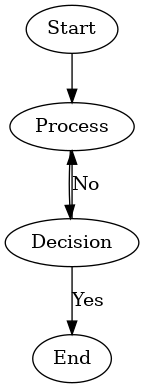

In [23]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph(comment='Simple Flowchart')

# Add nodes
dot.node('A', 'Start')
dot.node('B', 'Process')
dot.node('C', 'Decision')
dot.node('D', 'End')

# Add edges
dot.edges(['AB', 'BC'])
dot.edge('C', 'D', label='Yes')
dot.edge('C', 'B', label='No')

# Render to file (creates flowchart.png)
dot.render(directory='output', filename='flowchart', format='png', cleanup=True)

# Optional: view the DOT source
from PIL import Image
Image.open('flowchart.png').show()


Styled flowchart saved as styled_flowchart.png


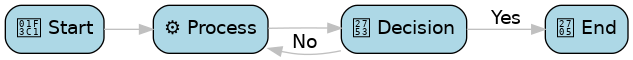

In [25]:
from graphviz import Digraph

dot = Digraph(comment='Styled Flowchart')

# Set global graph attributes
dot.attr(bgcolor='white', rankdir='LR', fontsize='20')

# Set node style
dot.attr('node', shape='box', style='filled,rounded', fillcolor='lightblue', fontname='Helvetica', fontcolor='black')

# Add nodes
dot.node('A', '🏁 Start')
dot.node('B', '⚙️ Process')
dot.node('C', '❓ Decision')
dot.node('D', '✅ End')

# Set edge style
dot.attr('edge', fontname='Helvetica', fontsize='14', color='gray')

# Add edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D', label='Yes')
dot.edge('C', 'B', label='No')

# Render to PNG
dot.render(filename='styled_flowchart', format='png', cleanup=True)

print("Styled flowchart saved as styled_flowchart.png")

from PIL import Image
Image.open('styled_flowchart.png').show()


In [30]:
# !curl -o- https://raw.githubusercontent.com/nvm-sh/nvm/v0.39.5/install.sh | bash

In [1]:
from langchain_core.messages import HumanMessage
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv  # Import load_dotenv


load_dotenv()

config = {"configurable": {"thread_id": "abc123"}}
model = init_chat_model("llama-3.1-8b-instant", model_provider="groq",max_tokens=2000)

prompt='''You are a diagram generator. Convert the following description into a Mermaid flowchart using markdown syntax. 
Keep it readable, structured, and use emojis if appropriate.
Output only the Mermaid code: User visits the login page, enters credentials, submits the form, gets authenticated, and lands on the dashboard.'''

response = model.invoke([HumanMessage(content=prompt)],config=config)

print(response.content)
# Save to file
with open("diagram.mmd", "w") as f:
    f.write(response.content)


```mermaid
graph LR
    User{Visits Login Page} -->|Submits Form|> Submit[Submit Credentials]
    Submit -->|Successful Authentication|> Authenticated[Gets Authenticated]
    Authenticated -->|Redirected|> Dashboard[Lands on Dashboard]
```


In [2]:
!mmdc -i diagram.mmd -o diagram.png --theme forest --backgroundColor transparent


/bin/bash: line 1: mmdc: command not found


In [ ]:

def paragraph_to_mermaid(prompt):
    system_prompt = """
You are a diagram generator. Convert the following description into a Mermaid flowchart using markdown syntax. 
Keep it readable, structured, and use emojis if appropriate.
Output only the Mermaid code.
    """

    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        temperature=0.2,
    )
    
    return response['choices'][0]['message']['content']

# Sample input
description = "User visits the login page, enters credentials, submits the form, gets authenticated, and lands on the dashboard."

# Convert to Mermaid
mermaid_code = paragraph_to_mermaid(description)

# Save to file
with open("diagram.mmd", "w") as f:
    f.write(mermaid_code)

print("Mermaid diagram written to diagram.mmd")


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['test ad campaigns manage social media pages send test email campaigns 📊 4 . analyze and improve use google analytics track conversions & user behavior a / b test your content 📜 5 . get certified boost your credibility with : google ads & analytics certs hubspot , meta blueprint 🔁 6 . stay updated follow blogs : moz , neil patel join communities : reddit , linkedin attend webinars / events 🎯 7 . choose a specialization focus on what you enjoy most : seo , ppc , social media , email , etc . give a simple flow chart of these steps']
100%|██████████| 50/50 [00:01<00:00, 34.78it/s]


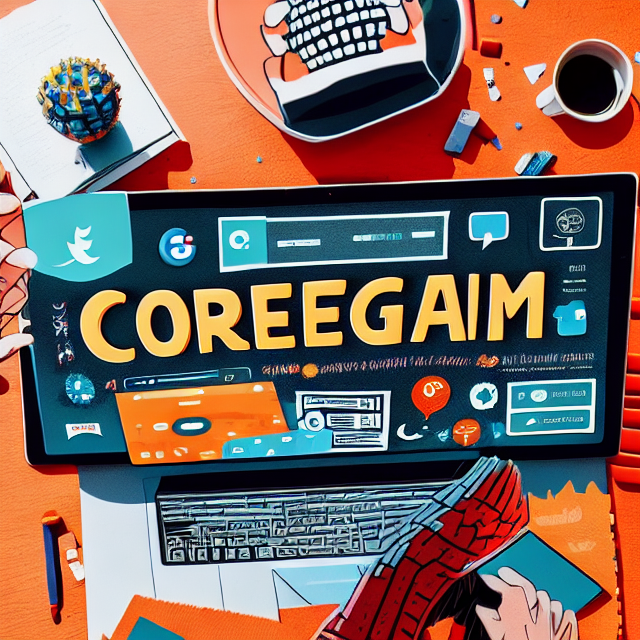

In [20]:
prompt_dig2='''🚀 1. Learn the Basics
Understand core areas:

SEO, SEM, Content Marketing

Social Media, Email, Analytics

📚 Try: Google Digital Garage, HubSpot Academy

🧰 2. Learn Tools
Familiar tools:

SEO: Google Search Console, Ahrefs

Ads: Google Ads, Facebook Ads

Email: Mailchimp

Analytics: Google Analytics

🧪 3. Practice
Create a blog/website

Run test ad campaigns

Manage social media pages

Send test email campaigns

📊 4. Analyze and Improve
Use Google Analytics

Track conversions & user behavior

A/B test your content

📜 5. Get Certified
Boost your credibility with:

Google Ads & Analytics Certs

HubSpot, Meta Blueprint

🔁 6. Stay Updated
Follow blogs: Moz, Neil Patel

Join communities: Reddit, LinkedIn

Attend webinars/events

🎯 7. Choose a Specialization
Focus on what you enjoy most:

SEO, PPC, Social Media, Email, etc. give a simple flow chart of these steps'''
image = pipe(prompt_dig2).images[0]
image

In [10]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

100%|██████████| 50/50 [00:01<00:00, 28.73it/s]


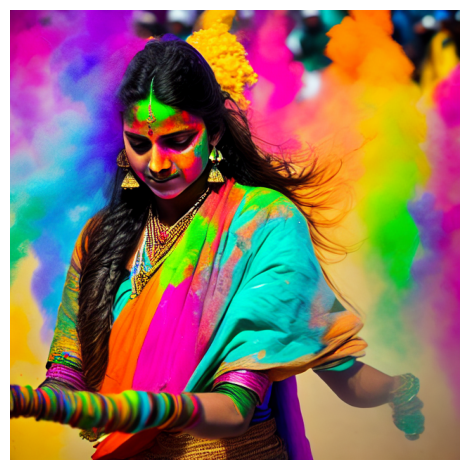

In [11]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}
generate_image(pipe, prompt, params)

100%|██████████| 100/100 [00:02<00:00, 41.99it/s]


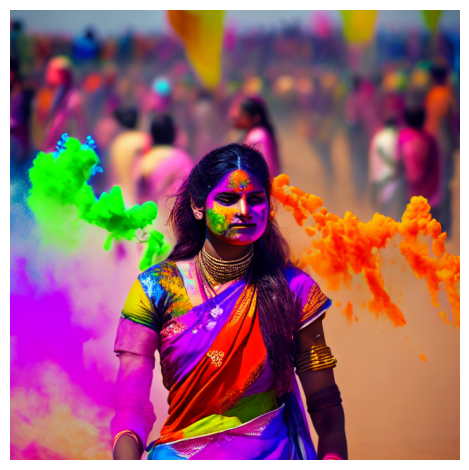

In [12]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [00:03<00:00, 29.48it/s]


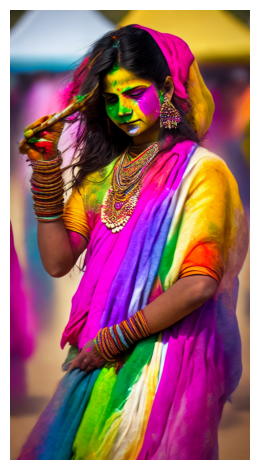

In [13]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [00:03<00:00, 28.06it/s]


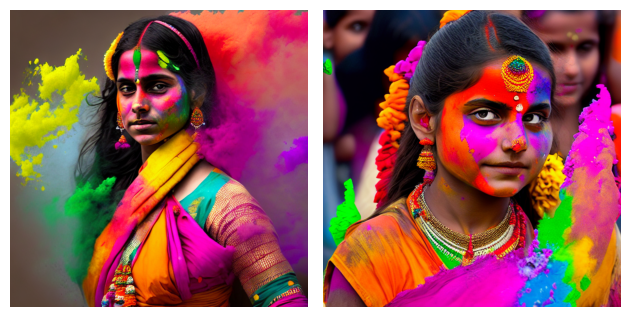

In [14]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [00:03<00:00, 28.32it/s]


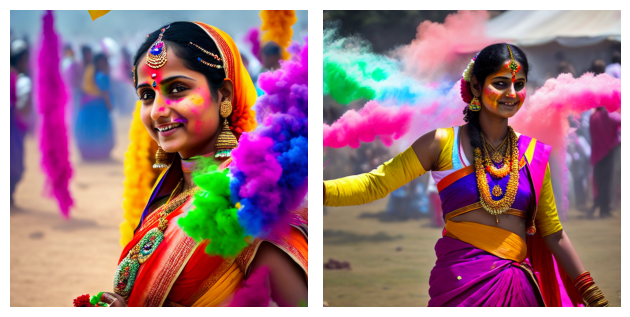

In [15]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

In [1]:
!pip install -U diffusers


In [5]:
import getpass
import os
# from tools.Rag_tool import RAGTool
# from tools.med_report_analyser import OCRTool
# from tools.med_report_analyser_copy import OCRTool
# from tools.websearch import WebSearchTool
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv  # Import load_dotenv

memory = MemorySaver()
load_dotenv()
# retrieval_tool = RAGTool(index_path="/home/shivas/Medchat/faiss_index")

# websearch = WebSearchTool()
# tools = [websearch]

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")


model = init_chat_model("llama-3.3-70b-versatile", model_provider="groq",max_tokens=4000)
config = {"configurable": {"thread_id": "abc123"}}
# agent_executor=create_react_agent(model,tools,checkpointer=memory)


In [6]:
from langchain_core.messages import HumanMessage

response = model.invoke([HumanMessage(content="i want to do a marketing campiagn for by food delivery comanpy write linkdin post for me")],config=config)

response.content
type(response.content)
print(response.content)

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [1]:
import getpass
import os
from tools.marketing_content import MarketingContentTool
from tools.OCR_Tool import OCRTool
from tools.post_creator import ImageWithTextTool

from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv  # Import load_dotenv
from langchain_community.tools import DuckDuckGoSearchResults



!mkdir static

websearch1 = DuckDuckGoSearchResults(output_format="list")


memory = MemorySaver()
load_dotenv()

marketing_content=MarketingContentTool()
ocr_Tool=OCRTool()
Post_creator=ImageWithTextTool()

tools = [websearch1,Post_creator,marketing_content]

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")


#model = init_chat_model("llama-3.3-70b-versatile", model_provider="groq",max_tokens=4000)
model = init_chat_model("llama-3.1-8b-instant", model_provider="groq",max_tokens=2000)
config = {"configurable": {"thread_id": "abc123"}}
agent_executor=create_react_agent(model,tools,checkpointer=memory)

ModuleNotFoundError: No module named 'fitz'

In [3]:
!pip install langchain_core

  Using cached langchain_core-0.3.64-py3-none-any.whl.metadata (5.8 kB)
  Using cached langsmith-0.3.45-py3-none-any.whl.metadata (15 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
Using cached langchain_core-0.3.64-py3-none-any.whl (438 kB)
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
Using cached langsmith-0.3.45-py3-none-any.whl (363 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.6 MB/s eta 0:00:00
U

In [8]:
from typing_extensions import Annotated, TypedDict
import getpass
import os
# from tools.marketing_content import Marke
# tingContentTool
# from tools.OCR_Tool import OCRTool
# from tools.post_creator import ImageWithTextTool

from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv  # Import load_dotenv
# from langchain_community.tools import DuckDuckGoSearchResults


model = init_chat_model("llama-3.1-8b-instant", model_provider="groq",max_tokens=2000)


class doc_info(TypedDict):
    response: Annotated[str, 'Creative response according to user query to help them in marketing']
    prompt: Annotated[str,'short and creative prompt to generate image to help user narrate the massage as per response ']


structured_model= model.with_structured_output(doc_info)

result=structured_model.invoke('''Project Summary: Zomato's Marketing Strategy
Objective:
To study Zomato's marketing approach, its impact on consumer behavior, and how it fares against
competitors like Swiggy.
Company Overview:
- Founded: 2008 by Deepinder Goyal & Pankaj Chaddah
- Original Name: Foodiebay -> rebranded to Zomato in 2010
- Business Model: Revenue from ads, commissions, and B2B supply (Hyperpure)
- Presence: Global expansion with 1M+ listed restaurants
Marketing Strategy:
- SEO Dominance: 99.4% of traffic is organic via 900K+ targeted keywords
- Social Media: Instagram-led campaigns, influencer collaborations
- Target Audience: 18-35 age group, mobile-savvy urban consumers
- Personalization: User data drives recommendations & email marketing
- Loyalty Program: Zomato Gold offers member-only perks
Research Highlights:
- Primary Usage: 89% use Zomato mainly for food delivery
- Usage Frequency: 38% order monthly; 30% weekly
- User Value Factors: Discounts, food quality, reviews, and menu pricing
- Pain Points: Glitches (27%), limited delivery areas (24%), delays (21%)
- Improvement Suggestions: More targeted ads, better social media presence
Hypothesis Tested:- H1: There is a significant correlation between Zomato's positioning strategy and consumer
preference
- Result: Supported by user data and engagement trends
Key Findings:
- Effective use of social media and influencer marketing
- Strong user-generated content via reviews
- Excellent brand equity and app usability
- Innovation through Hyperpure and cloud kitchen models
Suggestions:
- Introduce kids and senior-friendly meals
- Offer rewards for loyal users and storytellers
- App localization to cater to regional users
- Improve app security and delivery coverage
Conclusion:
Zomato's blend of tech innovation, strategic marketing, and consumer focus has positioned it as a
global foodtech leader. Its success is rooted in understanding modern consumer behavior and
adapting quickly through digital channels.''')

print(result)


BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<function=doc_info> {"prompt": "Zomato\'s marketing approach, impact on consumer behavior, and comparison with Swiggy", "response": "Zomato\'s marketing strategy has been successful in positioning it as a global foodtech leader. Its use of SEO, social media, and personalization has driven consumer engagement and loyalty. However, areas for improvement include app security and delivery coverage. Overall, Zomato\'s blend of tech innovation, strategic marketing, and consumer focus has enabled it to outperform competitors like Swiggy."}'}}

{'image_prompt': "A globe with a fork and spoon, surrounded by screens showing Zomato's app and website, with a cityscape in the background", 'response': 'Elevate your brand like Zomato, a global foodtech leader! With a strong online presence, personalized user experience, and robust SEO, you can drive user engagement and loyalty. Focus on enhancing your app security and delivery coverage to take your business to the next level. Join the ranks of successful foodtech companies with a solid marketing strategy!'}


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Elevate your brand like Zomato, a global foodtech leader! With a strong online presence, personalized user experience, and robust SEO, you can drive user engagement and loyalty. Focus on enhancing your app security and delivery coverage to take your business to the next level. Join the ranks of successful foodtech companies with a solid marketing strategy!


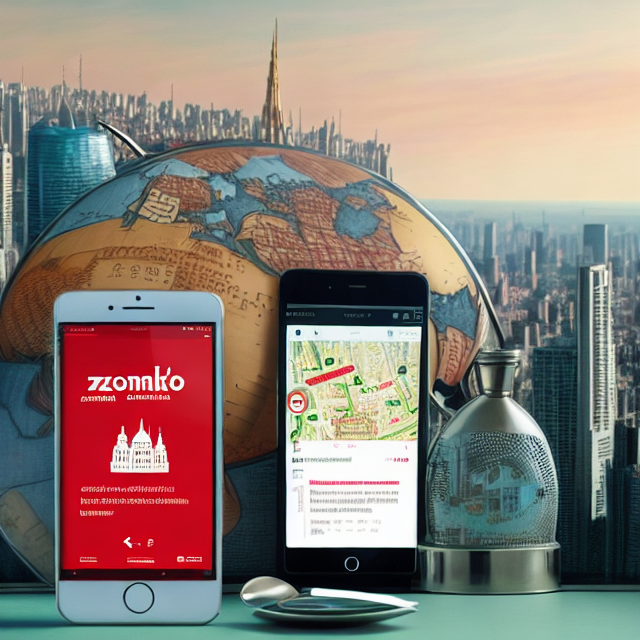

In [19]:
from typing import Optional

from typing_extensions import Annotated, TypedDict
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch
from tools.OCR_Tool import OCRTool
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage


model = init_chat_model("llama-3.3-70b-versatile", model_provider="groq",max_tokens=2000)
ocr_tool=OCRTool()

# TypedDict
class Joke(TypedDict):
    """promotional/marketing content."""

    response: Annotated[str, 'Creative response according to user query to help them in marketing']
    Image_prompt: Annotated[str,'prompt to generate poster/image of product/business/art in hd']


report_path="/mnt/nvme_disk2/User_data/ss57076k/Pitch-deck/zomato_summary.pdf"
report = ocr_tool._run(report_path)["extracted_text"]
prompt = f"{report}\n\nSummarize this report in 50 words."
summary = model.invoke([HumanMessage(content=prompt)])
sum_report = summary.content


    
## Final user query for the agent
# message_content = f"{input_text}\n\nReport Summary: {sum_report if sum_report else 'None'}"
# print("Final prompt to agent:\n", message_content)



structured_llm = model.with_structured_output(Joke)
user_query='i want to do a campaign to promote on linkdin'
final_prompt = f"""
You are a marketing assistant AI.

Your job is to generate:
1. A short and catchy marketing message (3-4 sentences) for LinkedIn
2. A one-line image prompt describing a creative visual scene for this campaign

Only return the following keys as output:
- 'response': the marketing copy
- 'image_prompt': the visual scene to depict the message

Do not add any other fields or explain anything. Just return a valid object matching the format.

Input:
- user_query: {user_query}
- business_summary: {sum_report}
"""


result=structured_llm.invoke(final_prompt)
print(result)
# Generate image using the prompt
image_prompt = result['image_prompt']


model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda:3")
# image = pipe(result[Image_prompt]).images[0]
image = pipe(image_prompt).images[0]

print(result['response'])
image


In [14]:
from typing import Optional

from typing_extensions import Annotated, TypedDict
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch
from tools.OCR_Tool import OCRTool
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage

# Load environment
load_dotenv()
ocr_tool = OCRTool()
model = init_chat_model("llama-3.1-8b-instant", model_provider="groq",max_tokens=2000)


# TypedDict
class Joke(TypedDict):
    """promotional/marketing content."""

    response: Annotated[str, 'Creative response according to user query to help them in marketing']
    Image_prompt: Annotated[str,'prompt to generate poster/image of product/business/art ']



structured_llm = model.with_structured_output(Joke)

result=structured_llm.invoke(''' Help me do some facebook promotion post, Project Summary: Zomato's Marketing Strategy
Objective:
To study Zomato's marketing approach, its impact on consumer behavior, and how it fares against
competitors like Swiggy.
Company Overview:
- Founded: 2008 by Deepinder Goyal & Pankaj Chaddah
- Original Name: Foodiebay -> rebranded to Zomato in 2010
- Business Model: Revenue from ads, commissions, and B2B supply (Hyperpure)
- Presence: Global expansion with 1M+ listed restaurants
Marketing Strategy:
- SEO Dominance: 99.4% of traffic is organic via 900K+ targeted keywords
- Social Media: Instagram-led campaigns, influencer collaborations
- Target Audience: 18-35 age group, mobile-savvy urban consumers
- Personalization: User data drives recommendations & email marketing
- Loyalty Program: Zomato Gold offers member-only perks
Research Highlights:
- Primary Usage: 89% use Zomato mainly for food delivery
- Usage Frequency: 38% order monthly; 30% weekly
- User Value Factors: Discounts, food quality, reviews, and menu pricing
- Pain Points: Glitches (27%), limited delivery areas (24%), delays (21%)
- Improvement Suggestions: More targeted ads, better social media presence
Hypothesis Tested:- H1: There is a significant correlation between Zomato's positioning strategy and consumer
preference
- Result: Supported by user data and engagement trends
Key Findings:
- Effective use of social media and influencer marketing
- Strong user-generated content via reviews
- Excellent brand equity and app usability
- Innovation through Hyperpure and cloud kitchen models
Suggestions:
- Introduce kids and senior-friendly meals
- Offer rewards for loyal users and storytellers
- App localization to cater to regional users
- Improve app security and delivery coverage
Conclusion:
Zomato's blend of tech innovation, strategic marketing, and consumer focus has positioned it as a
global foodtech leader. Its success is rooted in understanding modern consumer behavior and
adapting quickly through digital channels.''')

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda:3")
image = pipe(result['Image_prompt']).images[0]
print(result)
image


NameError: name 'load_dotenv' is not defined

In [ ]:
from typing import Annotated, TypedDict
from fastapi import FastAPI, Form
import requests
import os
import torch
from uuid import uuid4
from diffusers import StableDiffusionPipeline
from langchain_core.messages import HumanMessage
from langchain.chat_models import init_chat_model
from tools.OCR_Tool import OCRTool
import cloudinary
import cloudinary.uploader
from cloudinary.utils import cloudinary_url

# ---- CONFIG ----

# FastAPI app
app = FastAPI()

# Cloudinary config
cloudinary.config( 
    cloud_name = "dfq7tpkep", 
    api_key = "524777251618552", 
    api_secret = "TSElZuiWJJ7Waw4k63QRB1Qojv4",  # ← Replace with actual secret
    secure=True
)

# Model and tools
model = init_chat_model("llama-3.1-8b-instant", model_provider="groq", max_tokens=2000)
ocr_tool = OCRTool()

class Joke(TypedDict):
    response: Annotated[str, 'Creative response according to user query to help them in marketing']
    Image_prompt: Annotated[str, 'Prompt to generate poster/image in cartoon style']

structured_llm = model.with_structured_output(Joke)

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "dreamlike-art/dreamlike-diffusion-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True
)
pipe = pipe.to("cuda:3")  # Adjust if needed

# ---- ROUTE ----

@app.post("/generate")
async def generate(
    pdf_url: Annotated[str, Form()],
    user_query: Annotated[str, Form()]
):
    # Step 1: Download PDF
    temp_pdf_path = f"/tmp/{uuid4()}.pdf"
    try:
        response = requests.get(pdf_url)
        response.raise_for_status()
        with open(temp_pdf_path, "wb") as f:
            f.write(response.content)
    except Exception as e:
        return {"error": f"Failed to download PDF: {str(e)}"}

    # Step 2: OCR
    try:
        report = ocr_tool._run(temp_pdf_path)["extracted_text"]
        if not report:
            raise ValueError("No text extracted from PDF.")
    except Exception as e:
        return {"error": f"OCR failed: {str(e)}"}

    # Step 3: Summarize
    try:
        summary_prompt = f"{report}\n\nSummarize this report in 50 words."
        summary = model.invoke([HumanMessage(content=summary_prompt)])
        sum_report = summary.content
    except Exception as e:
        return {"error": f"Summarization failed: {str(e)}"}

    # Step 4: Generate creative response
    try:
        final_prompt = f"{user_query}\n\nReport Summary: {sum_report}"
        result: Joke = structured_llm.invoke(final_prompt)
    except Exception as e:
        return {"error": f"LLM generation failed: {str(e)}"}

    # Step 5: Generate image
    try:
        image = pipe(result["Image_prompt"]).images[0]
        temp_image_path = f"/tmp/marketing_{uuid4().hex}.png"
        image.save(temp_image_path)
    except Exception as e:
        return {"error": f"Image generation failed: {str(e)}"}

    # Step 6: Upload to Cloudinary
    try:
        upload_result = cloudinary.uploader.upload(temp_image_path, public_id=f"marketing/{uuid4().hex}")
        image_url = upload_result["secure_url"]
    except Exception as e:
        return {"error": f"Cloudinary upload failed: {str(e)}"}

    # Step 7: Return output
    return {
        "response": result["response"],
        "image_url": image_url
    }


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [20]:
import cloudinary
import cloudinary.uploader
from cloudinary.utils import cloudinary_url

# Configuration       
cloudinary.config( 
    cloud_name = "dfq7tpkep", 
    api_key = "524777251618552", 
    api_secret = "TSElZuiWJJ7Waw4k63QRB1Qojv4", # Click 'View API Keys' above to copy your API secret
    secure=True
)

# Upload an image
upload_result = cloudinary.uploader.upload("/mnt/nvme_disk2/User_data/ss57076k/Pitch-deck/Meril Life Sciences_ Company Overview.pdf",
                                           public_id="Pitch-deck",resource_type='raw',format="N/A")
print(upload_result["secure_url"])

# # Optimize delivery by resizing and applying auto-format and auto-quality
# optimize_url, _ = cloudinary_url("shoes", fetch_format="auto", quality="auto")
# print(optimize_url)

# # Transform the image: auto-crop to square aspect_ratio
# auto_crop_url, _ = cloudinary_url("shoes", width=500, height=500, crop="auto", gravity="auto")
# print(auto_crop_url)

https://res.cloudinary.com/dfq7tpkep/raw/upload/v1749309081/Pitch-deck.n/a


# **Structured output from Agent**

In [7]:
import getpass
import os
import shutil
import cv2
import json
import numpy as np
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage
from typing import Annotated, TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langchain.chat_models import init_chat_model
from langgraph.prebuilt import create_react_agent
from langchain_community.tools import DuckDuckGoSearchResults
import gradio as gr

from tools.marketing_content import MarketingContentTool
from tools.OCR_Tool import OCRTool
from tools.post_creator import ImageGenFromPromptTool



# Load environment
load_dotenv()

# Initialize tools and models
websearch1 = DuckDuckGoSearchResults(output_format="list")
ocr_tool = OCRTool()

if not os.environ.get("GROQ_API_KEY"):
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

model_llm = init_chat_model("llama-3.1-8b-instant", model_provider="groq", max_tokens=2000)

class Joke(TypedDict):
    response: Annotated[str, 'Creative response according to user query to help them in marketing']
    Image_prompt: Annotated[str, 'Prompt to generate poster/image in cartoon style']

structured_llm = model_llm.with_structured_output(Joke)
marketing_content = MarketingContentTool(model=model_llm)
post_creator = ImageGenFromPromptTool()

tools = [websearch1, marketing_content,post_creator]
config = {
    "configurable": {
        "thread_id": "medchat_001",
        "checkpoint_ns": "namespace_1",
        "checkpoint_id": "chk_001",
      
    }
}

# Initialize memory and agent
memory = MemorySaver()
agent_executor = create_react_agent(model_llm, tools, checkpointer=memory)


In [18]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("user", "Tell me a joke about {topic}")
])

prompt_template.invoke({"topic": "cats"})

ChatPromptValue(messages=[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Tell me a joke about cats', additional_kwargs={}, response_metadata={})])

In [8]:
result=model_llm.invoke('I have a food delivery company and i want to do a advertisment campaign for my business')
result.content

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [4]:
llm_with_tools=model_llm.bind_tools(tools)
structured_llm_with_tools = llm_with_tools.with_structured_output(Joke)
ai_msg=structured_llm_with_tools.invoke('I have a food delivery company and i want to do a advertisment campaign for my business')

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [3]:
message_content=('I have a food delivery company and i want to do a advertisment campaign for my business')

result = agent_executor.invoke({"messages": [HumanMessage(content=message_content)]}, config)


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
outputs = [msg.content for msg in result["messages"]]
final_output = outputs[-1]
# print(result)
# print(outputs)
print(final_output)

Here are some ideas to help you with your food delivery advertisement campaign:

1.  Partner with local influencers and food bloggers to promote your business.
2.  Offer promotions for first-time delivery customers to drive new users to your restaurant.
3.  Use social media platforms to share engaging content, such as behind-the-scenes glimpses of your kitchen or special deals.
4.  Collaborate with other local businesses to offer bundled deals or joint promotions.
5.  Utilize email marketing to keep your customers informed about new menu items, promotions, and events.
6.  Implement a loyalty program to reward repeat customers and encourage retention.
7.  Use data analytics to track your performance and make data-driven decisions about your marketing strategy.
8.  Consider offering a "meal of the month" or "dish of the week" promotion to create buzz and drive sales.

By implementing these ideas, you can effectively promote your food delivery business and attract new customers.

Here is 

In [7]:
result['messages'][-1].content

'Here are some ideas to help you with your food delivery advertisement campaign:\n\n1.  Partner with local influencers and food bloggers to promote your business.\n2.  Offer promotions for first-time delivery customers to drive new users to your restaurant.\n3.  Use social media platforms to share engaging content, such as behind-the-scenes glimpses of your kitchen or special deals.\n4.  Collaborate with other local businesses to offer bundled deals or joint promotions.\n5.  Utilize email marketing to keep your customers informed about new menu items, promotions, and events.\n6.  Implement a loyalty program to reward repeat customers and encourage retention.\n7.  Use data analytics to track your performance and make data-driven decisions about your marketing strategy.\n8.  Consider offering a "meal of the month" or "dish of the week" promotion to create buzz and drive sales.\n\nBy implementing these ideas, you can effectively promote your food delivery business and attract new customer

In [7]:
from pydantic import BaseModel, Field, model_validator
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate

# Define your desired data structure.
class Joke_output(BaseModel):
    Response: str = Field(description="{Response} text given by llm except {Image_prompt}")
    Image_prompt: str = Field(description="{Image_prompt} in the {Response}")

    # # You can add custom validation logic easily with Pydantic.
    # @model_validator(mode="before")
    # @classmethod
    # def question_ends_with_question_mark(cls, values: dict) -> dict:
    #     setup = values.get("setup")
    #     if setup and setup[-1] != "?":
    #         raise ValueError("Badly formed question!")
    #     return values

# Set up a parser + inject instructions into the prompt template.
parser = PydanticOutputParser(pydantic_object=Joke)

In [8]:
chain=agent_executor | parser

chain.invoke('I have a food delivery company and i want to do a advertisment campaign for my business',config)

InvalidUpdateError: Expected dict, got I have a food delivery company and i want to do a advertisment campaign for my business
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE